In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt 

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

# Exercises

The end result of this exercise should be a Jupyter notebook named model.

Using saas.csv or log data from API usage or store_item_sales

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df = df[df.City == 'Xingtai']

In [4]:
df['avg_temp_f'] = (df.AverageTemperature * 9/5) + 32 # converts temp to degree farenheit

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f
8309445,1820-08-01,21.229,2.202,Xingtai,China,37.78N,113.90E,70.2122
8309446,1820-09-01,17.984,1.691,Xingtai,China,37.78N,113.90E,64.3712
8309447,1820-10-01,10.542,1.772,Xingtai,China,37.78N,113.90E,50.9756
8309448,1820-11-01,2.814,1.886,Xingtai,China,37.78N,113.90E,37.0652
8309449,1820-12-01,-3.971,2.186,Xingtai,China,37.78N,113.90E,24.8522


In [6]:
df.shape

(2318, 8)

In [7]:
df.City.value_counts()

Xingtai    2318
Name: City, dtype: int64

In [8]:
df.Country.value_counts()

China    2318
Name: Country, dtype: int64

In [9]:
df.Latitude.value_counts()

37.78N    2318
Name: Latitude, dtype: int64

In [10]:
df.Longitude.value_counts()

113.90E    2318
Name: Longitude, dtype: int64

<AxesSubplot:>

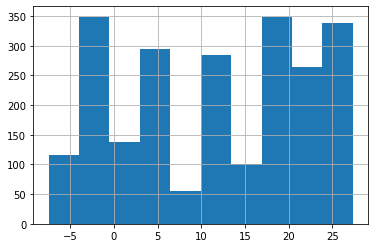

In [11]:
df.AverageTemperature.hist()

<AxesSubplot:>

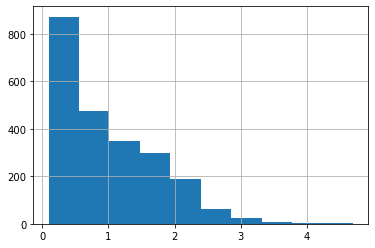

In [12]:
df.AverageTemperatureUncertainty.hist()

In [13]:
df.isnull().count()

dt                               2318
AverageTemperature               2318
AverageTemperatureUncertainty    2318
City                             2318
Country                          2318
Latitude                         2318
Longitude                        2318
avg_temp_f                       2318
dtype: int64

In [14]:
df.dt = pd.to_datetime(df.dt)

In [15]:
# Sort rows by the date and then set the index as that date
df = df.set_index("dt", drop=False).sort_index()

In [16]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f
dt,,,,,,,,
1820-08-01,1820-08-01,21.229,2.202,Xingtai,China,37.78N,113.90E,70.2122
1820-09-01,1820-09-01,17.984,1.691,Xingtai,China,37.78N,113.90E,64.3712
1820-10-01,1820-10-01,10.542,1.772,Xingtai,China,37.78N,113.90E,50.9756
1820-11-01,1820-11-01,2.814,1.886,Xingtai,China,37.78N,113.90E,37.0652
1820-12-01,1820-12-01,-3.971,2.186,Xingtai,China,37.78N,113.90E,24.8522


In [17]:
df['weekday'] = df.index.day_name()

In [18]:
df['month'] = pd.DatetimeIndex(df.dt).month
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f,weekday,month
dt,,,,,,,,,,
1820-08-01,1820-08-01,21.229,2.202,Xingtai,China,37.78N,113.90E,70.2122,Tuesday,8
1820-09-01,1820-09-01,17.984,1.691,Xingtai,China,37.78N,113.90E,64.3712,Friday,9
1820-10-01,1820-10-01,10.542,1.772,Xingtai,China,37.78N,113.90E,50.9756,Sunday,10
1820-11-01,1820-11-01,2.814,1.886,Xingtai,China,37.78N,113.90E,37.0652,Wednesday,11
1820-12-01,1820-12-01,-3.971,2.186,Xingtai,China,37.78N,113.90E,24.8522,Friday,12


In [19]:
df['year'] = pd.DatetimeIndex(df.dt).year
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f,weekday,month,year
dt,,,,,,,,,,,
1820-08-01,1820-08-01,21.229,2.202,Xingtai,China,37.78N,113.90E,70.2122,Tuesday,8,1820
1820-09-01,1820-09-01,17.984,1.691,Xingtai,China,37.78N,113.90E,64.3712,Friday,9,1820
1820-10-01,1820-10-01,10.542,1.772,Xingtai,China,37.78N,113.90E,50.9756,Sunday,10,1820
1820-11-01,1820-11-01,2.814,1.886,Xingtai,China,37.78N,113.90E,37.0652,Wednesday,11,1820
1820-12-01,1820-12-01,-3.971,2.186,Xingtai,China,37.78N,113.90E,24.8522,Friday,12,1820


In [20]:
# remove leap days
df = df[df.index != '2016-02-29']

In [21]:
df = df.fillna(method='ffill')

In [22]:
train_size = int(len(df) * .5)
train_size

1159

In [23]:
validate_size = int(len(df) * .3)
validate_size

695

In [24]:
test_size = int(len(df) - train_size - validate_size)
test_size

464

In [25]:
validate_end_index = train_size + validate_size
validate_end_index

1854

In [26]:
train = df[: train_size]
validate = df[train_size:validate_end_index]
test = df[validate_end_index:]

In [27]:
print(len(train) + len(validate) + len(test) == len(df))

True


In [28]:
print(df.head(1) == train.head(1))

              dt  AverageTemperature  AverageTemperatureUncertainty  City  \
dt                                                                          
1820-08-01  True                True                           True  True   

            Country  Latitude  Longitude  avg_temp_f  weekday  month  year  
dt                                                                          
1820-08-01     True      True       True        True     True   True  True  


In [29]:
pd.concat([train.tail(1), validate.head(1)])

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f,weekday,month,year
dt,,,,,,,,,,,
1917-02-01,1917-02-01,-1.585,0.578,Xingtai,China,37.78N,113.90E,29.1470,Thursday,2,1917
1917-03-01,1917-03-01,4.394,0.542,Xingtai,China,37.78N,113.90E,39.9092,Thursday,3,1917


In [30]:
pd.concat([validate.tail(1), test.head(1)])

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,avg_temp_f,weekday,month,year
dt,,,,,,,,,,,
1975-01-01,1975-01-01,-1.987,0.186,Xingtai,China,37.78N,113.90E,28.4234,Wednesday,1,1975
1975-02-01,1975-02-01,0.076,0.248,Xingtai,China,37.78N,113.90E,32.1368,Saturday,2,1975


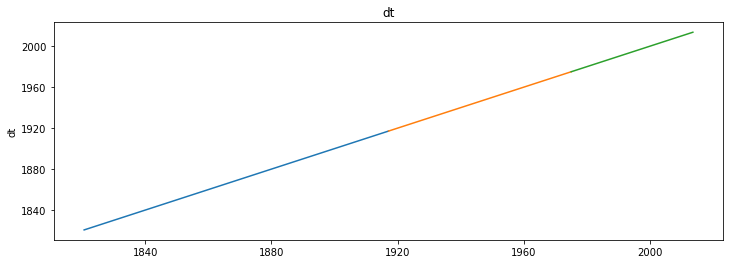

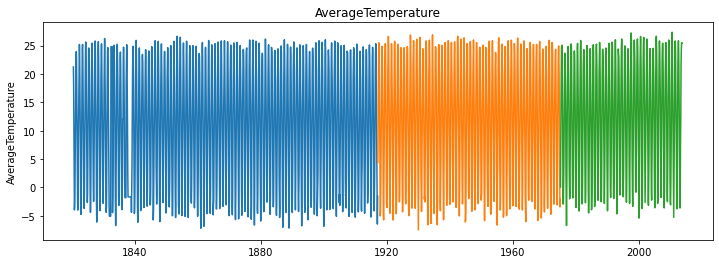

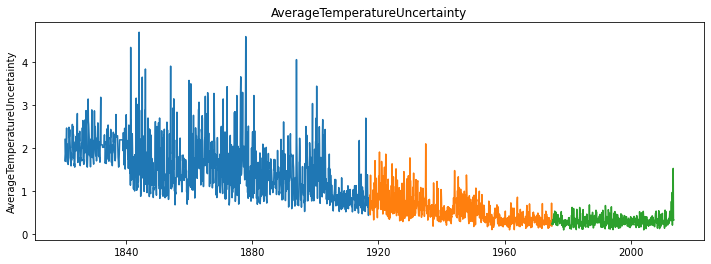

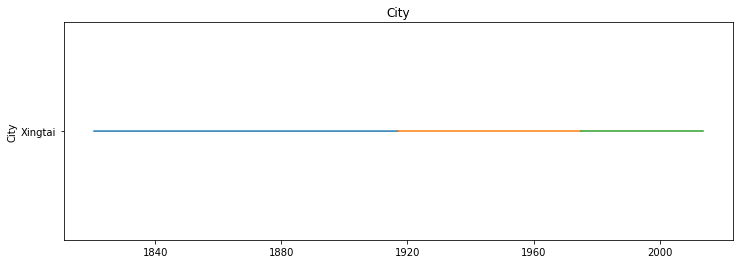

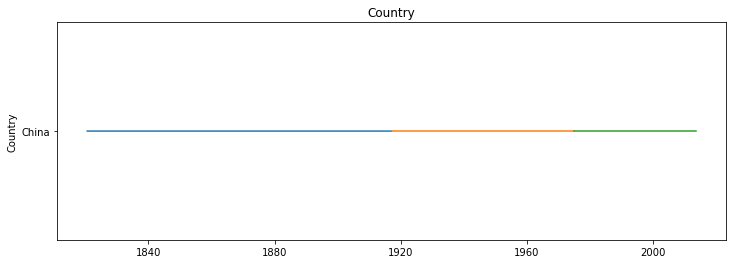

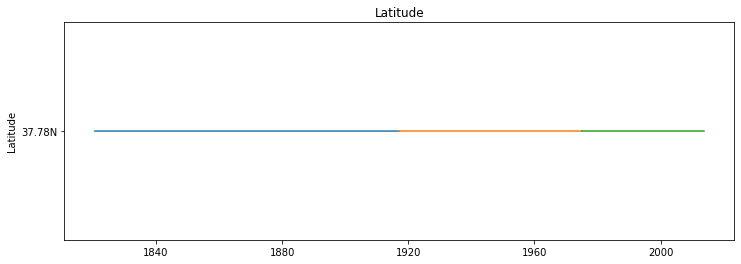

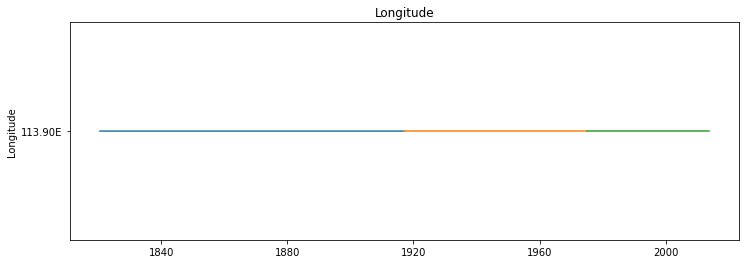

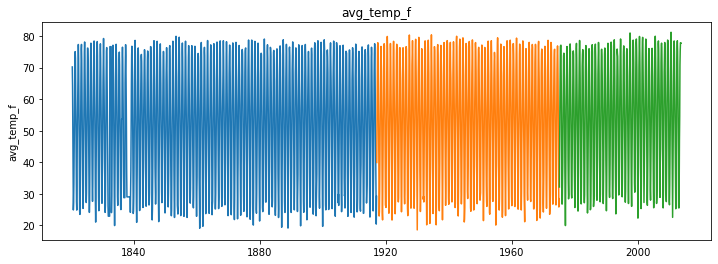

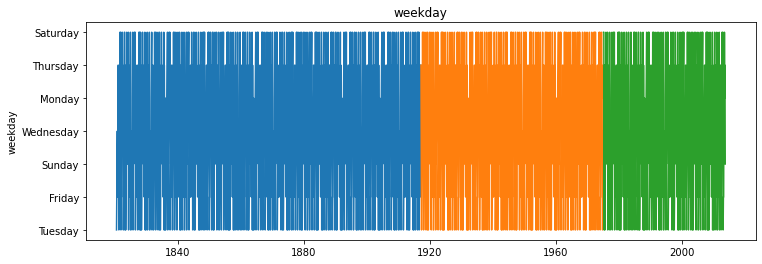

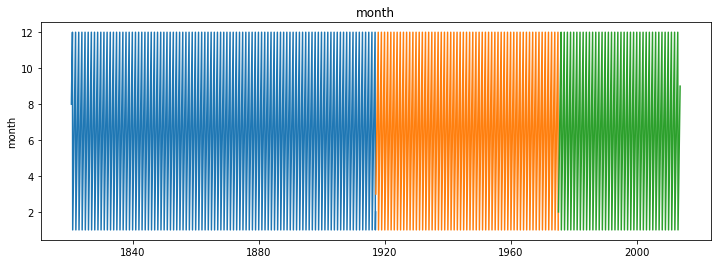

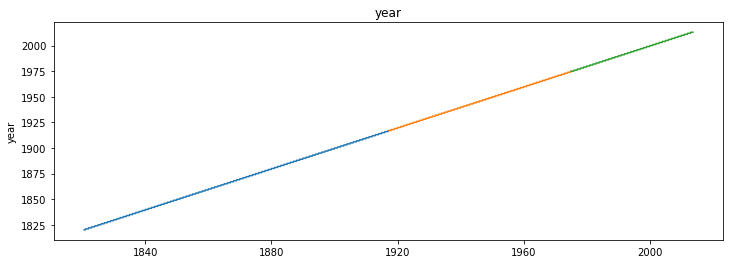

In [31]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [32]:
train.dt.nunique()

1159

In [33]:
df.dt.min()

Timestamp('1820-08-01 00:00:00')

In [34]:
df.dt.max()

Timestamp('2013-09-01 00:00:00')

In [35]:
df.dt.max() - df.dt.min()

Timedelta('70523 days 00:00:00')

In [36]:
# 193 years of data (assuming all years are filled)

In [37]:
# China industrial reveluation 1988 (I want to look at 1988 - 2013)

In [38]:
def plot_temp_data(train):
    
    plt.figure(figsize=(20, 30))
    
    plt.subplot(10,1,1)
    train.avg_temp_f.plot()
    
    plt.subplot(10,1,2)
    train.AverageTemperature.plot()
    
    plt.subplot(10,1,3)
    train.AverageTemperatureUncertainty.plot()


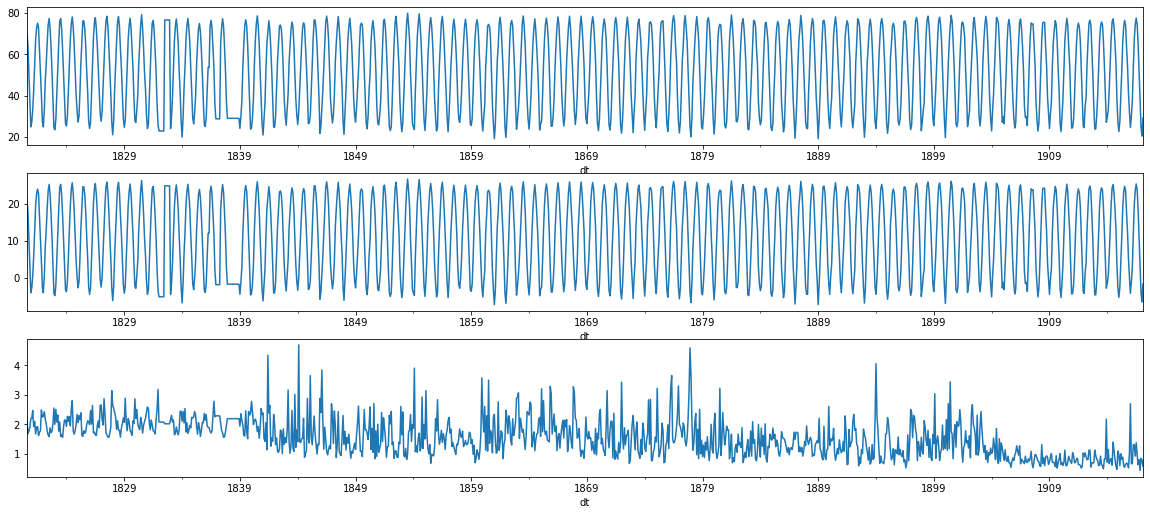

In [39]:
plot_temp_data(train)

<AxesSubplot:xlabel='year'>

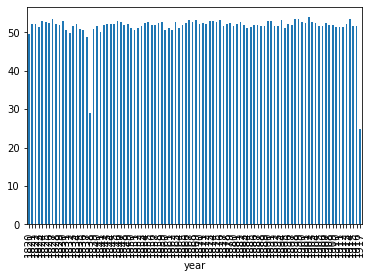

In [40]:
# Plot mean temperature by month (bar plot)
train.groupby('year').avg_temp_f.mean().plot.bar()

<AxesSubplot:xlabel='weekday', ylabel='avg_temp_f'>

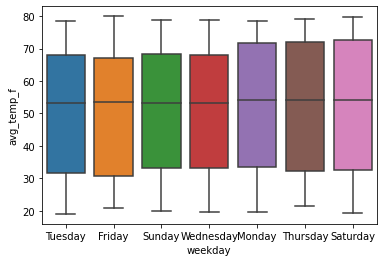

In [41]:
sns.boxplot(data = train, x = 'weekday', y = 'avg_temp_f')

<AxesSubplot:xlabel='month', ylabel='avg_temp_f'>

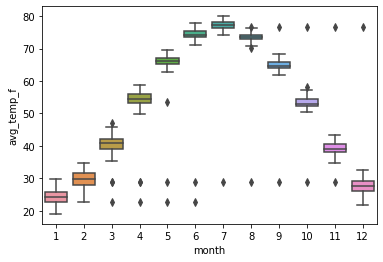

In [42]:
sns.boxplot(data = train, x = 'month', y = 'avg_temp_f')

<AxesSubplot:xlabel='year', ylabel='avg_temp_f'>

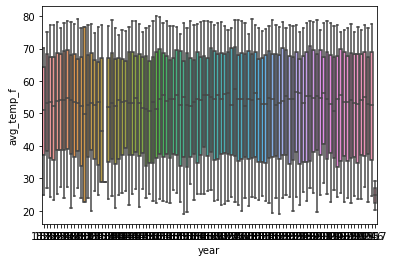

In [43]:
sns.boxplot(data = train, x = 'year', y = 'avg_temp_f')

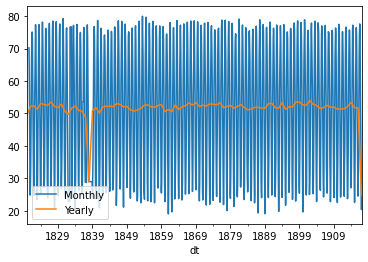

In [44]:
train.avg_temp_f.resample('M').mean().plot(label = 'Monthly')
train.avg_temp_f.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

In [45]:
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [46]:
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [47]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# Last observed value

In [48]:
avg_temp_f = round(train['avg_temp_f'][-1:][0], 2)
avg_temp_f

29.15

In [49]:
yhat_df = pd.DataFrame({'avg_temp_f': [avg_temp_f]},  
                      index = validate.index)

yhat_df.head()
yhat_df.describe()

,avg_temp_f
count,6.950000e+02
mean,2.915000e+01
std,7.110545e-14
min,2.915000e+01
25%,2.915000e+01
50%,2.915000e+01
75%,2.915000e+01
max,2.915000e+01


avg_temp_f -- RMSE: 30


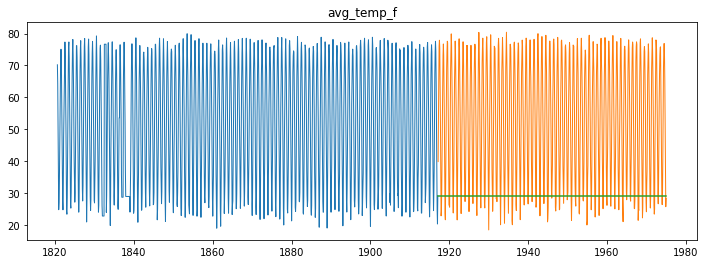

In [50]:
plot_and_eval('avg_temp_f')

In [51]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'avg_temp_f' )

In [52]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp_f,30.0


# Simple Average

In [53]:
# compute simple average

# plt.plot(train['dollars_sold'])
avg_temp_f = round(train['avg_temp_f'].mean(),2)
avg_temp_f

51.75

In [54]:
def make_predictions():
    yhat_df = pd.DataFrame({'avg_temp_f': [avg_temp_f]}, 
                           index = validate.index)
    return yhat_df

In [55]:
yhat_df = make_predictions()

In [56]:
yhat_df.head()

,avg_temp_f
dt,
1917-03-01,51.75
1917-04-01,51.75
1917-05-01,51.75
1917-06-01,51.75
1917-07-01,51.75


In [57]:
yhat_df.describe()

,avg_temp_f
count,695.00
mean,51.75
std,0.00
min,51.75
25%,51.75
50%,51.75
75%,51.75
max,51.75


avg_temp_f -- RMSE: 19


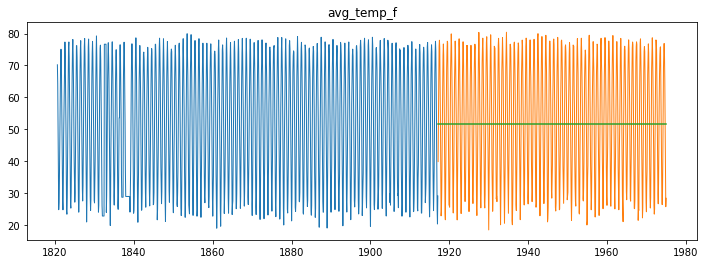

In [58]:
plot_and_eval('avg_temp_f')

In [59]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'avg_temp_f')


In [60]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp_f,30.0
1,simple_average,avg_temp_f,19.0


# Moving Average

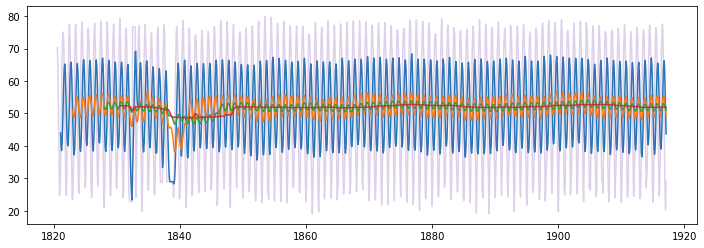

In [61]:
# train['dollars_sold'].tail(30)
plt.figure(figsize=(12,4))
plt.plot(train['avg_temp_f'].rolling(7).mean())
plt.plot(train['avg_temp_f'].rolling(30).mean())
plt.plot(train['avg_temp_f'].rolling(90).mean())
plt.plot(train['avg_temp_f'].rolling(120).mean())
plt.plot(train['avg_temp_f'], alpha=.3)

In [62]:
periods = [30, 100, 365, 730]

for p in periods:
    avg_temp_f = round(train['avg_temp_f'].rolling(p).mean()[-1], 2)

print(avg_temp_f)

52.21


In [63]:
yhat_df = make_predictions()
yhat_df.head()

,avg_temp_f
dt,
1917-03-01,52.21
1917-04-01,52.21
1917-05-01,52.21
1917-06-01,52.21
1917-07-01,52.21


avg_temp_f -- RMSE: 19


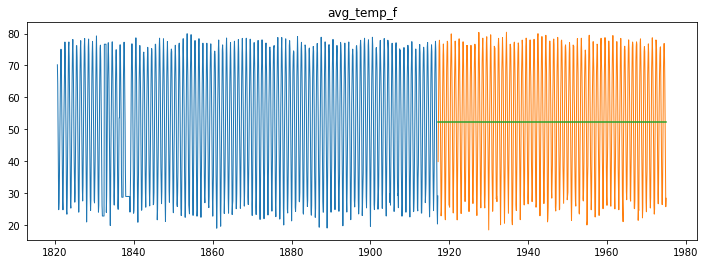

In [64]:
plot_and_eval('avg_temp_f')

In [65]:
eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = 'avg_temp_f' )


In [66]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp_f,30.0
1,simple_average,avg_temp_f,19.0
2,30d_moving_avg,avg_temp_f,19.0


In [67]:
eval_df.rmse.min()

19.0

# Holt's Linear Trend

In [68]:
import statsmodels.api as sm

In [73]:
train.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
avg_temp_f                       0
weekday                          0
month                            0
year                             0
dtype: int64

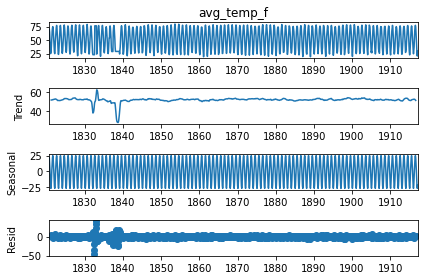

In [81]:
sm.tsa.seasonal_decompose(train.avg_temp_f.resample('M').mean()).plot()
plt.show()

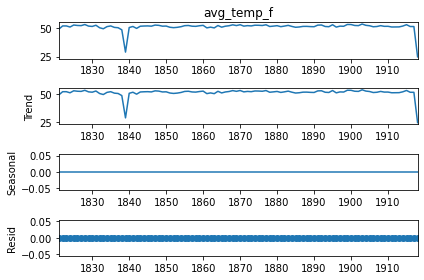

In [91]:
sm.tsa.seasonal_decompose(train.avg_temp_f.resample('Y').mean()).plot()
plt.show()

In [88]:
model = Holt(train, exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                            end = validate.index[-1])


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
yhat_df.head()